<a href="https://colab.research.google.com/github/lilaceri/projects/blob/main/Spotify_wrapped_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
---
In the following worksheet we are going to creat your very own version of Spotify Wrapped!
We will guide you step by step to complete the following:

1. Import python packages required to run the notebook

2. Import your personal Spotify Data

3. Print your most listened to artist, song & genre

4. Discover in which month you listened to the most music

4. Bar chart

5. Pie Chart
    
6. Wordcloud

# **TASK 0: Loading in your spotify data**
---

Before we get started - we need to check there is the right data downloaded 

1. Check there is files beginning with "StreamingHistory" to the left side 

Raise your hand if you have any problems with this

If you would like to use your own data - simply replace the 'StreamingData" files in this folder with your own.

# **Task 1: Import Packages, Read in Data, load necessary functions and data prep code**


---


**Run the below cells** by clicking the play button on the left of each cell that says *Show Code* to install all necessary packages, read in the required data, load the prewritten functions and data preparation code.

*Tip: once the cell has run a number will appear where the play button was like [1] to show how many times the cell has been ran*

In [ ]:
# @title
'''
THIS CELL IMPORTS ALL THE PACKAGES YOU NEED
'''
# ! pip install plotly
# ! pip install matplotlib
# ! pip install wordcloud
# ! pip install numpy scipy scikit-learn
# ! pip install fuzzywuzzy
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import json
import pandas as pd
from fuzzywuzzy import process
import plotly.graph_objs as go
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import os

In [ ]:
def get_local_filepaths():
    files = os.listdir()
    json_files = [f for f in files if f.endswith('.json')]
    json_file_paths = [os.path.abspath(f) for f in json_files]
    return json_file_paths

def load_local_json_data(file_path):
      dfs = []
      for file in file_path:
        dfs.append(pd.read_json(file))
    
      all_df = pd.concat(dfs, ignore_index=True)
      all_df['Seconds Played'] = all_df['msPlayed'] / 1000
      return all_df


def load_links():
    sh0_df = pd.read_json("https://raw.githubusercontent.com/lilaceri/projects/refs/heads/main/hannah%20data%20spotify/StreamingHistory_music_0.json?token=GHSAT0AAAAAACYTFHL23XEOFUU4W7NJ5QYGZYEOCBA")
    sh1_df = pd.read_json("https://raw.githubusercontent.com/lilaceri/projects/refs/heads/main/hannah%20data%20spotify/StreamingHistory_music_1.json?token=GHSAT0AAAAAACYTFHL25FGQVSFVWL73RMBMZYEOCQQ")
    sh2_df = pd.read_json("https://raw.githubusercontent.com/lilaceri/projects/refs/heads/main/hannah%20data%20spotify/StreamingHistory_music_2.json?token=GHSAT0AAAAAACYTFHL3FPKUVNIHAT3CEMCQZYEODCA")

    sh_all_df = pd.concat([sh0_df, sh1_df, sh2_df], axis=0)

    # Remove any "Unnamed" columns
    sh_all_df = sh_all_df.loc[:, ~sh_all_df.columns.str.contains('^Unnamed')]
    sh_all_df['Seconds Played'] = sh_all_df['msPlayed'] / 1000
    # Convert milliseconds to seconds

    return sh_all_df

def most_played(category, df):
    grouped_df = df.groupby(category)['Seconds Played'].sum()
    sorted_df = grouped_df.sort_values(ascending=False)
    top_entry = sorted_df.head(1)
    return top_entry

def predict_genre(hour, month, day):
    # Preprocess new data
    time_sin = np.sin(2 * np.pi * hour / 24)
    time_cos = np.cos(2 * np.pi * hour / 24)
    new_data = pd.DataFrame([[time_sin, time_cos, month, day]], columns=['time_sin', 'time_cos', 'Month', 'Day'])

    # Predict genre
    genre_encoded = model.predict(new_data)[0]

    # Decode genre
    genre = label_encoder.inverse_transform([genre_encoded])[0]
    return genre
def assign_season(df):
    """
    Assign a season to each row in the DataFrame based on the 'Month' column.

    Parameters:
        df (pandas.DataFrame): The DataFrame containing the 'Month' column (numeric, 1-12).

    Returns:
        pandas.DataFrame: The DataFrame with an additional 'Season' column.
    """
    season_mapping = {
        12: 'Winter', 1: 'Winter', 2: 'Winter',
        3: 'Spring', 4: 'Spring', 5: 'Spring',
        6: 'Summer', 7: 'Summer', 8: 'Summer',
        9: 'Fall', 10: 'Fall', 11: 'Fall'
    }

    df['Season'] = df['Month'].map(season_mapping)
    return df

In [ ]:
# @title

# links = ["https://raw.githubusercontent.com/lilaceri/projects/refs/heads/main/hannah%20data%20spotify/StreamingHistory_music_0.json?token=GHSAT0AAAAAACYTFHL23XEOFUU4W7NJ5QYGZYEOCBA","https://raw.githubusercontent.com/lilaceri/projects/refs/heads/main/hannah%20data%20spotify/StreamingHistory_music_1.json?token=GHSAT0AAAAAACYTFHL25FGQVSFVWL73RMBMZYEOCQQ", "https://raw.githubusercontent.com/lilaceri/projects/refs/heads/main/hannah%20data%20spotify/StreamingHistory_music_2.json?token=GHSAT0AAAAAACYTFHL3FPKUVNIHAT3CEMCQZYEODCA"]
dfs = get_local_filepaths()

df_list= []
if len(dfs) < 1:
    all_data = load_links()
    artists_df = pd.read_csv("https://github.com/lilaceri/projects/blob/main/datasets/artists.csv?raw=true", index_col = False)
    tracks = pd.read_csv("https://github.com/lilaceri/projects/raw/refs/heads/main/datasets/tracks.csv", index_col = False)
else:
    all_data = load_local_json_data(dfs)
    artists_df = pd.read_csv("artists.csv")
    tracks = pd.read_csv("tracks.csv")

all_data = all_data.merge(artists_df, how = "left", on = "artistName")
all_data = pd.merge(all_data, tracks, how = "left", on = "trackName")
all_data['endTime'] = pd.to_datetime(all_data['endTime'])
all_data['Year'] = all_data['endTime'].dt.year
all_data['Month'] = all_data['endTime'].dt.month
all_data['Hour'] = all_data['endTime'].dt.hour
all_data['Day'] = all_data['endTime'].dt.day

all_data['time_sin'] = np.sin(2 * np.pi * all_data['Hour'] / 24)
all_data['time_cos'] = np.cos(2 * np.pi * all_data['Hour'] / 24)
label_encoder = LabelEncoder()
all_data['genre_encoded'] = label_encoder.fit_transform(all_data['genre'])
X = all_data[['time_sin', 'time_cos', "Month", "Day"]]
y = all_data['genre_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Check data preparation


---


Run the cell below to check the data has imported correctly

What do you notice about the dataset? What columns are there?

(*TIP: if you want to see the first 5 rows of a dataset* ``` datasetName.head() ``` *where datasetName is the variable name of your dataset - in this case its called all_data*)

In [ ]:
all_data.head()

# **Task 2: Most played artist, song & genre**


---
Run the cell below to find out your most played Genre.



(*TIP: we have created a function called* ```most played``` *for you, in the cell below you are running it with the required inputs to get an output - in this case the inputs (or parameters) are* ```"genre"``` *and the dataset name* ```all_data```)

In [ ]:
most_played("genre", all_data)

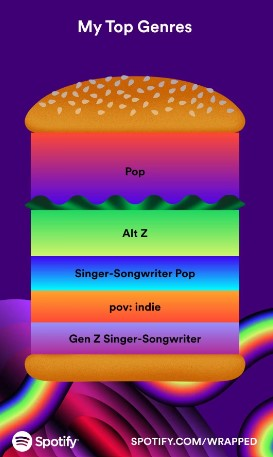

## 2.2 What is your most played track & artist?

---
Now it's your turn...

We gave you the code in the example above, have a go changing the code cells below to find out your most played track and artist

**Ensure that you replace the #INSERT with the required column names.**

*Hint: The column names you need are one of:* ```"ArtistName"```, ```"followers"```, ```"trackName"```, ```"popularity"```, ```"genre"```

*Hint #2: dont forget " "*



In [ ]:
most_played(#INSERT, all_data)

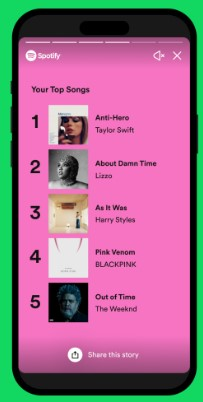

Who is your most played artist?

In [ ]:
most_played(#INSERT, all_data)

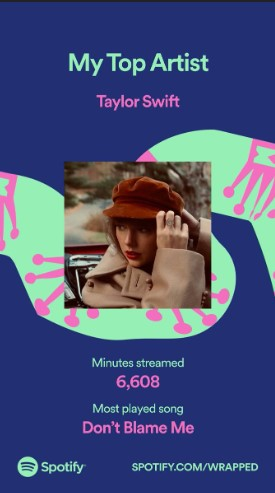

# **Task 3: Month most music played**


---

Lets find when you listened to the most music!

1. Run the first cell to see which year you listened to the most music.

2. Then, replace #INSERT in the next cell with the correct column nmae to determine which month you listened to the most music.

Run the code below to find the number of minutes you listened to spotify per year.

In [ ]:
grouped_by_year = all_data.groupby('Year')['Seconds Played'].sum()
grouped_by_year

Edit the code below to get the number of seconds you listened to Spotify per Month.

In [ ]:
grouped_by_month = all_data.groupby(#INSERT)['Seconds Played'].sum()
grouped_by_month

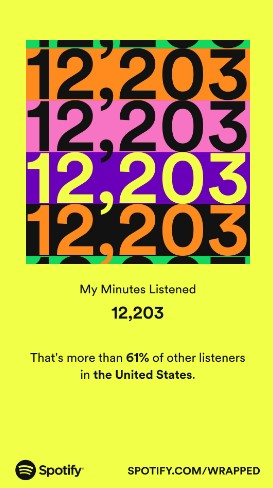

# **Task 4: Plot of Most played Artists**
---
Lets create a bar chart so we can easily see who our most played artists are!

1. Run the first cell to get your top 10 artists.

2. Then make changes to the 2nd cell to create a bar chart: Replace the #INSERT with a title name for the bar graph of your choosing.

In [ ]:
grouped_by_artist = all_data.groupby('artistName')['Seconds Played'].sum()
grouped_by_artist_sorted = grouped_by_artist.sort_values(ascending=False)
top_ten_artists = grouped_by_artist_sorted.head(10)
top_ten_artists

In [ ]:
# Create a bar trace
bar_trace = go.Bar(
    x=top_ten_artists.index,
    y=top_ten_artists.values,
    marker=dict(color='skyblue')  # Set the color of bars
)

# Create layout
layout = go.Layout(
    title= #INSERT,
    xaxis=dict(title='Artist'),
    yaxis=dict(title='Total Playtime (ms)')
)

# Create figure
fig = go.Figure(data=[bar_trace], layout=layout)

# Show plot
fig.show()

# **Task 6: Plot of most played artist by season**
---

Next, lets see what time of year you listen to your most played artists!

1. Insert the correct column name into the cell below.

*Hint: it is one of the following: "Seconds Played", "artistName", "genre"*

2. Add a title of your chosing.

In [ ]:
all_data = assign_season(all_data)

all_data['Season'] = pd.Categorical(all_data['Season'])

grouped_data = all_data.groupby(["artistName", "Season"])[#INSERT].sum().reset_index()

top_artists = grouped_data.groupby("artistName")["Seconds Played"].sum().nlargest(10).index

# Filter the data to include only the top 10 artists
filtered_data = grouped_data[grouped_data["artistName"].isin(top_artists)]

# Create a stacked bar chart
fig = px.bar(filtered_data,
             x="artistName",
             y="Seconds Played",
             color="Season",
             title=#INSERT,
             labels={"Seconds Played": "Total Listening Time (ms)", "artistName": "Artist"})

# Show the plot
fig.show()

# **Task 7: Plot pie chart of most listened genres**
---
Next, lets make a pie chart of our most listened genres!

1. Replace #INSERT in the cell below with the correct column name.

In [ ]:
# Group the data by genre and sum the playtime
genre_playtime = all_data.groupby(#INSERT)['Seconds Played'].sum()

# Sort the playtime in descending order
genre_playtime_sorted = genre_playtime.sort_values(ascending=False)

# Select the top 10 genres
top_10_genres = genre_playtime_sorted.head(10)

# Create a pie chart
fig = px.pie(top_10_genres,
             values=top_10_genres.values,
             names=top_10_genres.index,
             title='Top 10 Genres by Listening Time')

# Show the plot
fig.show()


# **Task 8: Wordcloud of song adjectives**
---
A wordcloud is a visualisation where the size of the word reflects the size of the value.

For example, if most common word to describe the songs you listen to is "energy", that will be the largest word.

Run the code below to generate a word cloud!

In [ ]:
# Calculate the overall value for each column
overall_values = all_data[['danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']].mean()

# Create a dictionary of words and their sizes based on the overall values
word_sizes = {emotion: int(overall_value * 100) for emotion, overall_value in overall_values.items()}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_sizes)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# **Task 9: Create a model to predict which genre to listen to based on the date and time of day**
---
Run the cell below to predict which genre you should listen to based on the date and time of day!

*(we have created the statistical model for this in the hidden code at the beginning of the worksheet)*

You can change the hour, month and day to see the prediction at different times of the day... try changing to your birthday!

In [ ]:
# predict which genre to listen to based on the date and time
hour = 14  # = 2 PM
month = 5  # = May
day = 20 # = 20th

predicted_genre = predict_genre(hour, month, day)

month_name = calendar.month_name[month]

print(f'Based on your previous listening patterns, the best genre to listen to for {hour}:00 on {month_name} {day} is {predicted_genre}')